In [60]:
#1 importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set(style="whitegrid")


In [61]:
#2 ahora las nominas
df1 = pd.read_excel("acuario.xlsx")
df2 = pd.read_excel("ciencia.xlsx")
df3 = pd.read_excel("comedores.xlsx")
df4 = pd.read_excel("consumidor.xlsx")
df5 = pd.read_excel("contraloria.xlsx")


In [62]:
#3 Homogeneizar columnas
def clean_cols(df):
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

df1 = clean_cols(df1)
df2 = clean_cols(df2)
df3 = clean_cols(df3)
df4 = clean_cols(df4)
df5 = clean_cols(df5)


In [63]:
#4 Concatenar las nominas en una sola
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df


nombres          apellidos  \
0                   NaN                NaN   
1        EDWIN AMBIORIX    MENDEZ BAUTISTA   
2                EDISON     ESTEVEZ FILION   
3             MARGARITA         REYES DIAZ   
4              CRISTIAN             CUEVAS   
...                 ...                ...   
6052          ROSELAINE  RODRIGUEZ SANCHEZ   
6053              LIDIA             CABRAL   
6054           VIRTUDIS    MONTERO MONTERO   
6055  NICOLAS DE OVANDO       PASCAL MORLA   
6056     AGUSTIN AMAURY   NOBOA VALENZUELA   

                               insitución  \
0                                     NaN   
1                        ACUARIO NACIONAL   
2                        ACUARIO NACIONAL   
3                        ACUARIO NACIONAL   
4                        ACUARIO NACIONAL   
...                                   ...   
6052  CONTRALORIA GENERAL DE LA REPUBLICA   
6053  CONTRALORIA GENERAL DE LA REPUBLICA   
6054  CONTRALORIA GENERAL DE LA REPUBLICA   
6055  CONTRALORIA GENERAL DE LA REPUBLICA   
6056  CONTRALORIA GENERAL DE LA REPUBLICA   

                                  función  \
0                                     NaN   
1                                  PINTOR   
2                                CHOFER I   
3                                CONSERJE   
4                                CONSERJE   
...                                   ...   
6052  ANALISTA RECLU. SELEC. Y EVALUACION   
6053          AUXILIAR ADMINISTRATIVO (A)   
6054                            AUDITOR I   
6055                      SOPORTE TECNICO   
6056                      AUDITOR TECNICO   

                                                   área     genero  \
0                                                   NaN        NaN   
1                        SECCION DE MAYORDOMIA- ACUARIO  MASCULINO   
2     DEPARTAMENTO DE CALIDAD DE VIDA DE LAS ESPECIE...  MASCULINO   
3                        SECCION DE MAYORDOMIA- ACUARIO   FEMENINO   
4                        SECCION DE MAYORDOMIA- ACUARIO  MASCULINO   
...                                                 ...        ...   
6052                 DIRECCIÓN DE RECURSOS HUMANOS- CGR   FEMENINO   
6053  DIRECCIÓN DE UNIDADES DE AUDITORÍA INTERNA GUB...   FEMENINO   
6054  DIRECCIÓN DE UNIDADES DE AUDITORÍA INTERNA GUB...   FEMENINO   
6055          DIRECCION DE TECNOLOGIA DE LA INFORMACION  MASCULINO   
6056  DIRECCIÓN DE UNIDADES DE AUDITORÍA INTERNA GUB...  MASCULINO   

                   estatus sueldo_bruto  
0                      NaN          NaN  
1                     FIJO    23,000.00  
2                     FIJO    31,000.00  
3                     FIJO    21,000.00  
4                     FIJO    21,000.00  
...                    ...          ...  
6052  EMPLEADOS TEMPORALES    70,000.00  
6053                  FIJO    40,000.00  
6054  EMPLEADOS TEMPORALES    60,000.00  
6055                  FIJO    40,000.00  
6056                  FIJO    60,000.00  

[6057 rows x 8 columns]

In [64]:
#fase 2 - limpieza de datos
#5 Revisar datos nulos y calidad
df.isnull().sum()


nombres         5
apellidos       5
insitución      5
función         5
área            5
genero          5
estatus         5
sueldo_bruto    5
dtype: int64

In [65]:
#6 Eliminar filas vacias
df = df.dropna(how="all")


In [66]:
#7 Limpiar columna de sueldo
df = df.copy() 
temp = (
    df["sueldo_bruto"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.replace(" ", "", regex=False)
)

temp = pd.to_numeric(temp, errors="coerce")
df.loc[:, "sueldo_bruto"] = temp

In [67]:
#fase 2 - limpieza de datos
df.isnull().sum()


nombres         0
apellidos       0
insitución      0
función         0
área            0
genero          0
estatus         0
sueldo_bruto    0
dtype: int64

In [68]:
#7. Eliminar filas vacias
df = df.dropna(how="all")


In [69]:
#8. Revisar tipos de datos
df.dtypes


nombres         object
apellidos       object
insitución      object
función         object
área            object
genero          object
estatus         object
sueldo_bruto    object
dtype: object

In [70]:
#10. Identificar columnas categóricas
df.select_dtypes(include="object").columns


Index(['nombres', 'apellidos', 'insitución', 'función', 'área', 'genero',
       'estatus', 'sueldo_bruto'],
      dtype='object')

In [71]:
#12. Verificar que tenemos minimo 6 features + 1 label
df.shape


(6052, 8)

In [72]:
#FASE 3 — ANÁLISIS EXPLORATORIO (EDA)
#13. Estadisticas basicas
df.describe()


nombres apellidos                       insitución   función  \
count        6052      6052                             6052      6052   
unique       4434      5048                                5       402   
top     JOSE LUIS     REYES  COMEDORES ECONOMICOS DEL ESTADO  CONSERJE   
freq           22        19                             2600       501   

                                                     área    genero estatus  \
count                                                6052      6052    6052   
unique                                                307         2       6   
top     DIRECCIÓN DE UNIDADES DE AUDITORÍA INTERNA GUB...  FEMENINO    FIJO   
freq                                                  889      3191    4187   

        sueldo_bruto  
count         6052.0  
unique         146.0  
top          13000.0  
freq          1192.0

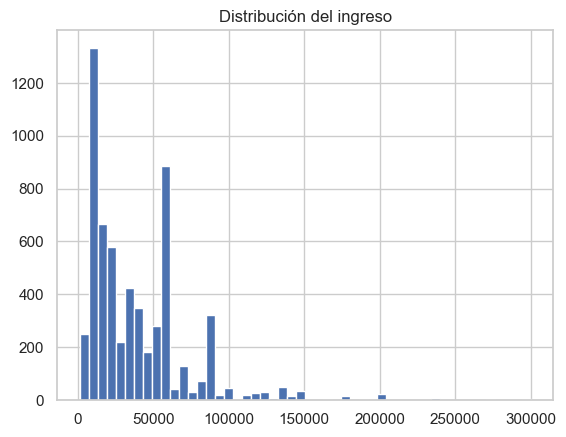

In [73]:
#14 Histograma del ingreso
plt.hist(df["sueldo_bruto"], bins=50)
plt.title("Distribución del ingreso")
plt.show()


<Axes: xlabel='genero', ylabel='sueldo_bruto'>

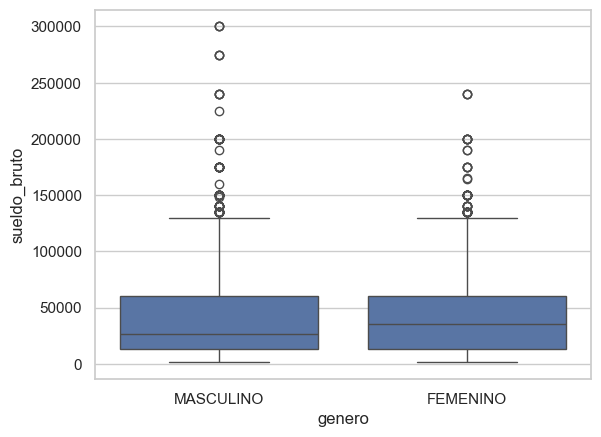

In [74]:
#15. Boxplot por género
sns.boxplot(x="genero", y="sueldo_bruto", data=df)


<Axes: >

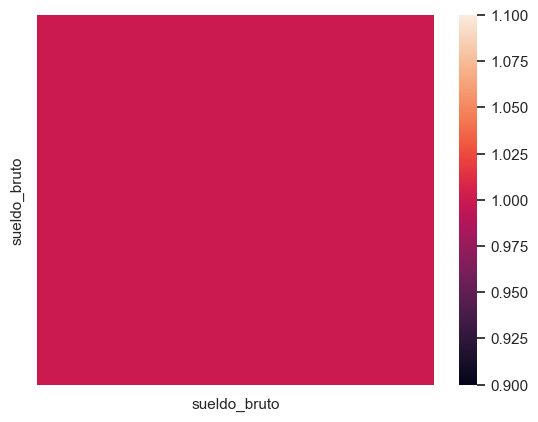

In [80]:
#16. Correlaciones
df["sueldo_bruto"] = pd.to_numeric(df["sueldo_bruto"], errors="coerce")
df = df.dropna(subset=["sueldo_bruto"])

sns.heatmap(df.select_dtypes(include="number").corr())


In [81]:
#17. Ingreso por institución
df.groupby("insitución")["sueldo_bruto"].mean().sort_values()



insitución
COMEDORES ECONOMICOS DEL ESTADO                                    17366.176454
INSTITUTO NACIONAL DE PROTECCION DE LOS DERECHOS DEL CONSUMIDOR    43321.351748
ACUARIO NACIONAL                                                   44865.404040
MINISTERIO DE EDUCACION SUPERIOR, CIENCIA Y TECNOLOGIA             51700.894854
CONTRALORIA GENERAL DE LA REPUBLICA                                62390.426340
Name: sueldo_bruto, dtype: float64

In [82]:
#FASE 4 — MODELOS DE REGRESIÓN
#18. Dividir X e y
X = df.drop("sueldo_bruto", axis=1)
y = df["sueldo_bruto"]
X.head(), y.head()
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (6052, 7)
Shape de y: (6052,)


In [83]:
#19. Train-test split
X = df[["insitución", "función", "área", "genero", "estatus"]]
y = df["sueldo_bruto"]

# --- Train-Test Split ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (4841, 5)
X_test: (1211, 5)
y_train: (4841,)
y_test: (1211,)


In [84]:
#20 Codificar variables categoricas
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_cols = X.columns 
num_cols = []          
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ],
    remainder="drop"
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4841, 674)
X_test shape: (1211, 674)
y_train shape: (4841,)
y_test shape: (1211,)


In [85]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

modelos = {
    "OLS": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Bayesian": BayesianRidge(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVR": SVR(),
    "MLP": MLPRegressor(max_iter=500),
    "AdaBoost": AdaBoostRegressor()
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    resultados.append([nombre, mse, np.sqrt(mse), r2])

import pandas as pd
tabla = pd.DataFrame(resultados, columns=["Modelo","MSE","RMSE","R2"])
tabla



C:\Users\pauli\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+10, tolerance: 5.282e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo           MSE          RMSE        R2
0           OLS  2.478477e+08  15743.181000  0.771150
1         Ridge  2.479317e+08  15745.847021  0.771072
2         Lasso  2.479964e+08  15747.901436  0.771013
3      Bayesian  2.501883e+08  15817.341369  0.768989
4           KNN  3.879229e+08  19695.757342  0.641812
5  DecisionTree  3.560423e+08  18869.084285  0.671248
6  RandomForest  2.321924e+08  15237.861904  0.785605
7           SVR  1.148315e+09  33886.792500 -0.060296
8           MLP  2.898991e+08  17026.422366  0.732322
9      AdaBoost  7.990536e+08  28267.536182  0.262194


RESULTADOS DE EVALUACIÓN

Tabla de Métricas Completa:
      Modelo          MSE         RMSE        R2
         OLS 2.478477e+08 15743.181000  0.771150
       Ridge 2.479317e+08 15745.847021  0.771072
       Lasso 2.479964e+08 15747.901436  0.771013
    Bayesian 2.501883e+08 15817.341369  0.768989
         KNN 3.879229e+08 19695.757342  0.641812
DecisionTree 3.560423e+08 18869.084285  0.671248
RandomForest 2.321924e+08 15237.861904  0.785605
         SVR 1.148315e+09 33886.792500 -0.060296
         MLP 2.898991e+08 17026.422366  0.732322
    AdaBoost 7.990536e+08 28267.536182  0.262194

MEJOR MODELO: RandomForest
   R² en Test: 0.7856


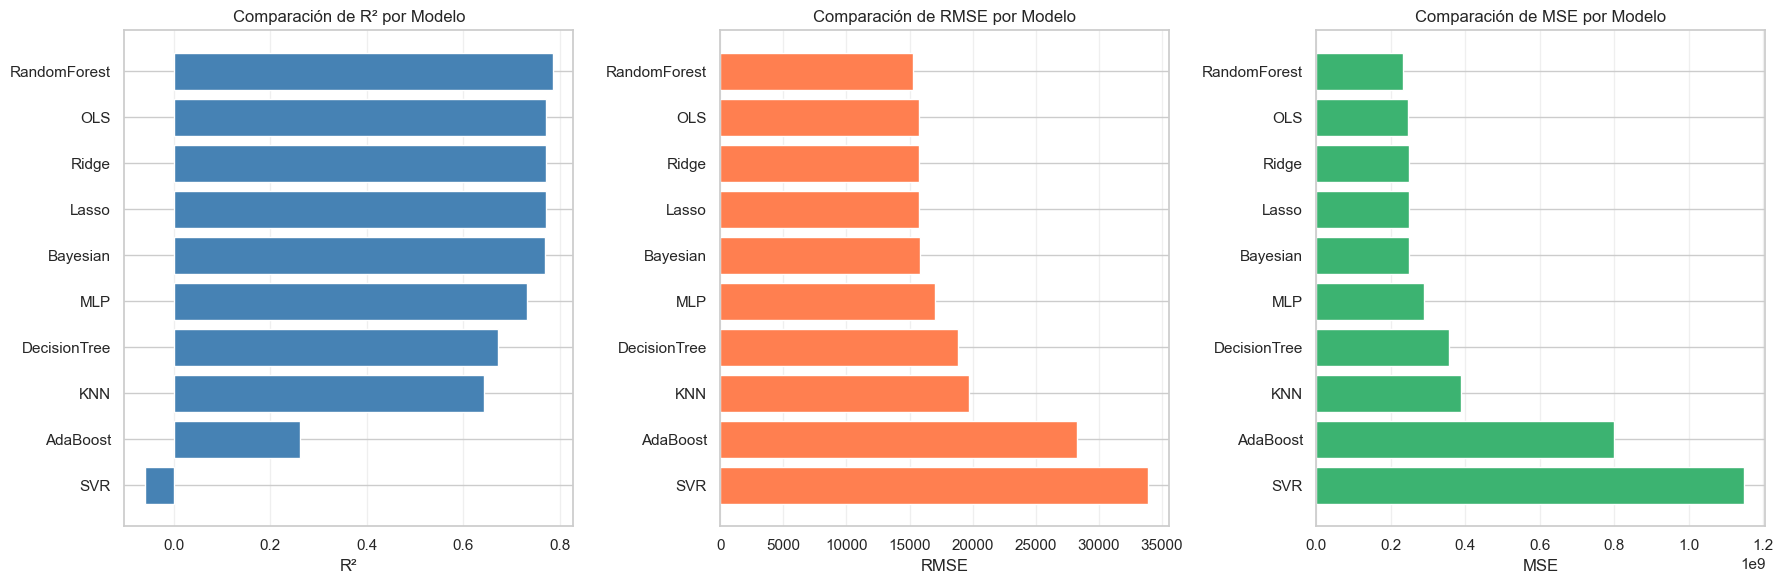

In [96]:
df_resultados = tabla  # renombramos para mantener consistencia

print("\n" + "="*60)
print("RESULTADOS DE EVALUACIÓN")
print("="*60)
print("\nTabla de Métricas Completa:")
print(df_resultados.to_string(index=False))

# Mejor modelo según R²
mejor_modelo_idx = df_resultados['R2'].idxmax()
mejor_modelo_nombre = df_resultados.loc[mejor_modelo_idx, 'Modelo']
mejor_r2 = df_resultados.loc[mejor_modelo_idx, 'R2']

print(f"\nMEJOR MODELO: {mejor_modelo_nombre}")
print(f"   R² en Test: {mejor_r2:.4f}")

# Visualización de resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Comparación de R²
df_sorted = df_resultados.sort_values('R2', ascending=True)
axes[0].barh(df_sorted['Modelo'], df_sorted['R2'], color='steelblue')
axes[0].set_xlabel('R²')
axes[0].set_title('Comparación de R² por Modelo')
axes[0].grid(True, alpha=0.3, axis='x')

# 2. Comparación de RMSE
axes[1].barh(df_sorted['Modelo'], df_sorted['RMSE'], color='coral')
axes[1].set_xlabel('RMSE')
axes[1].set_title('Comparación de RMSE por Modelo')
axes[1].grid(True, alpha=0.3, axis='x')

# 3. Comparación de MSE
axes[2].barh(df_sorted['Modelo'], df_sorted['MSE'], color='mediumseagreen')
axes[2].set_xlabel('MSE')
axes[2].set_title('Comparación de MSE por Modelo')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

